# Lab 4: Titanic Regression – Predicting Fare  
**Author:** Prince  
**Date:** 04/01/2025  
**Objective:** Predicting Titanic passenger fare using regression models including Linear Regression, Ridge, Elastic Net, and Polynomial Regression.  



## 1. Introduction  
This project analyzes the **Titanic dataset** to predict the **fare** paid by passengers using various regression models.  
We'll clean the data, explore feature relationships, and build models such as **Linear Regression**, **Ridge**, **Elastic Net**, and **Polynomial Regression** to understand how passenger attributes impact ticket pricing.


## Section 1 Imports  
In the code cell below, import the necessary Python libraries for analyzing the Titanic dataset.  

In [1]:
# Import pandas & numpy for data manipulation
import pandas as pd
import numpy as np

# Import matplotlib & seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split for splitting data
from sklearn.model_selection import train_test_split

# Import regression models
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet

# Import PolynomialFeatures for polynomial regression
from sklearn.preprocessing import PolynomialFeatures

# Import performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## Section 2: Import and Inspect the Data

### 2.1 Load the dataset and display the first 10 rows  
Load the **Titanic dataset** using Seaborn and convert it into a **pandas DataFrame**.  
We will inspect the first few rows to understand the structure and begin preparing it for regression modeling.



In [2]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Display the first 10 rows
titanic.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### 2.2 Check for Missing Values and Display Summary Statistics  

In the cell below:  
1. Use `info()` to check data types and missing values.  
2. Use `describe()` to see summary statistics.  
3. Use `isnull().sum()` to identify missing values in each column.  


In [4]:
# Check data types and missing values
titanic.info()

# Display summary statistics
titanic.describe()

# Check for missing values in each column
titanic.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [204]:
titanic = titanic.assign(embark_town=titanic['embark_town'].fillna(titanic['embark_town'].mode()[0]))

In [205]:
print(titanic.isnull().sum())


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64


In [8]:
# Fill missing age with median (safe method to avoid warning)
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

# Fill missing 'embarked' and 'embark_town' with mode
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

# Drop 'deck' only if it exists
titanic.drop(columns=['deck'], inplace=True, errors='ignore')

# Create new numeric feature: family_size
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Final structure and null check
titanic.info()
print("\nMissing values per column:")
print(titanic.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
 14  family_size  891 non-null    int64   
dtypes: bool(2), category(1), float64(2), int64(5), object(5)
memory usage: 86.4+ KB

Missing values per column:
survived       0
pclass         0
sex            0


## Reflection 1  

1) **How many data instances are there?**  
   - There are **891** data instances (rows) in the Titanic dataset.  

2) **How many features are there?**  
   - There are **15** features (columns) in the dataset.  

3) **What are the names of the features?**  
   - `survived`, `pclass`, `sex`, `age`, `sibsp`, `parch`, `fare`, `embarked`,  
     `class`, `who`, `adult_male`, `deck`, `embark_town`, `alive`, `alone`.  

4) **Are there any missing values?**  
   - Yes, missing values exist in:  
     - `age` (177 missing)  
     - `embarked` (2 missing)  
     - `embark_town` (2 missing)  
     - `deck` (688 missing)  

5) **Are there any non-numeric features?**  
   - Yes, categorical (non-numeric) features include:  
     - `sex`, `embarked`, `class`, `who`, `alive`, `embark_town`.  

6) **Are the data instances sorted on any attributes?**  
   - No, the dataset is **not sorted** on any attribute.  

7) **What are the units of `age`?**  
   - `age` is measured in **years**.  

8) **What are the minimum, median, and max age?**  
   - Min Age: **0.42** years  
   - Median Age: **28.0** years  
   - Max Age: **80.0** years  

9) **What two features have the highest correlation?**  
   - `parch` and `sibsp` have the highest correlation (**0.41**).

10) **Are there any categorical features that might be useful for prediction?**  
    - Yes, useful categorical features include:  
      - **pclass** (Passenger class)  
      - **sex** (Gender)  
      - **embarked** (Port of Embarkation)  
      - **who** (Man, Woman, Child)  
      

---

## Reflection 2 – Data Preparation and Feature Engineering  

11) **How did you handle missing values?**  
- Filled missing values in `age` with the **median** (28.0 years) to avoid skewing results.  
- Filled `embarked` and `embark_town` with their respective **modes**.  
- Dropped the `deck` column due to excessive missing values (688 out of 891).  

12) **Did you create any new features?**  
- Yes, we created a new numeric feature called **`family_size`**, calculated as:  
  `family_size = sibsp + parch + 1`  
  This represents the total number of people a passenger was traveling with, including themselves.

13) **Are there any features with high correlation?**  
- `sibsp` and `parch` are positively correlated with **`family_size`** (by design).  
- These could impact fare predictions, especially for families traveling together.

14) **What is the final shape of the cleaned dataset?**  
- **891 rows**, **15 columns**, and **no missing values**.  
- The dataset is now clean and ready for regression modeling.


## Section 3: Feature Selection and Justification

We will define four different feature sets (`X1`, `X2`, `X3`, and `X4`) to predict the continuous target variable `fare`.  
Each case explores a different combination of features to evaluate their impact on prediction performance.


In [9]:
# Case 1: Use age only
X1 = titanic[['age']]
y1 = titanic['fare']

# Case 2: Use family_size only
X2 = titanic[['family_size']]
y2 = titanic['fare']

# Case 3: Use age and family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

# Case 4: Your custom feature combo (e.g., age, family_size, pclass, sex_encoded)
# First encode 'sex' (object → numeric)
titanic['sex_encoded'] = titanic['sex'].map({'male': 0, 'female': 1})

# Define your own combo: age, family_size, pclass, and sex
X4 = titanic[['age', 'family_size', 'pclass', 'sex_encoded']]
y4 = titanic['fare']


### Reflection – Feature Selection

1) **Why might these features affect fare?**  
I chose features that I believe could logically influence how much a passenger paid for their ticket. For example, `age` might matter because older passengers could afford more expensive tickets, or children may have received discounts. `family_size` could influence fare because passengers traveling in groups may get reduced rates or choose cheaper accommodations. `pclass` clearly relates to ticket cost since first-class passengers paid more than third-class. I also included `sex` because there may be some indirect patterns in the data related to gender and fare.

2) **List of available features:**  
Here are the columns we can work with after cleaning the data:  
`survived`, `pclass`, `sex`, `age`, `sibsp`, `parch`, `fare`, `embarked`, `class`, `who`, `adult_male`, `embark_town`, `alive`, `alone`, `family_size`, `sex_encoded`

3) **Which features might improve predictions and why?**  
I think `pclass` will be one of the most useful features because it’s directly tied to the quality of the accommodations and cost. `sex_encoded` might help because it could be correlated with class or group travel decisions. `age` and `family_size` help capture demographic and social context, which might also influence fare.

4) **How many variables are in Case 4?**  
Case 4 uses 4 features: `age`, `family_size`, `pclass`, and `sex_encoded`.

5) **Why did I choose these features for Case 4?**  
I chose this combination because it includes a mix of personal (age, sex), social (family_size), and economic (pclass) factors. Together, they give the model a more complete view of the passenger, which I believe will help improve fare predictions.


## Section 4: Train a Regression Model (Linear Regression)

In this section, we’ll train Linear Regression models using each of the four feature cases.  
We'll split the data, fit the models, make predictions, and evaluate performance using R², RMSE, and MAE.


## 4.1 Split the Data

In [10]:
# Split all 4 cases into training and test sets (80/20 split)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)


## 4.2 Train Linear Regression Models & Predict

In [11]:
# Train linear regression models
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Make predictions for training and test sets
y1_pred_train = lr_model1.predict(X1_train)
y1_pred_test = lr_model1.predict(X1_test)

y2_pred_train = lr_model2.predict(X2_train)
y2_pred_test = lr_model2.predict(X2_test)

y3_pred_train = lr_model3.predict(X3_train)
y3_pred_test = lr_model3.predict(X3_test)

y4_pred_train = lr_model4.predict(X4_train)
y4_pred_test = lr_model4.predict(X4_test)


## 4.3 Evaluate and Report Performance

In [13]:
# Define a reusable function to evaluate models
def evaluate_model(case, y_train, y_train_pred, y_test, y_test_pred):
    print(f"\n--- {case} ---")
    print(f"Train R²: {r2_score(y_train, y_train_pred):.3f}")
    print(f"Test R²: {r2_score(y_test, y_test_pred):.3f}")
    print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")
    print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred):.2f}")

# Evaluate all 4 linear regression models
evaluate_model("Case 1 (Age)", y1_train, y1_pred_train, y1_test, y1_pred_test)
evaluate_model("Case 2 (Family Size)", y2_train, y2_pred_train, y2_test, y2_pred_test)
evaluate_model("Case 3 (Age + Family Size)", y3_train, y3_pred_train, y3_test, y3_pred_test)
evaluate_model("Case 4 (Age + Family Size + Pclass + Sex)", y4_train, y4_pred_train, y4_test, y4_pred_test)



--- Case 1 (Age) ---
Train R²: 0.010
Test R²: 0.003
Test RMSE: 37.97
Test MAE: 25.29

--- Case 2 (Family Size) ---
Train R²: 0.050
Test R²: 0.022
Test RMSE: 37.61
Test MAE: 25.03

--- Case 3 (Age + Family Size) ---
Train R²: 0.073
Test R²: 0.050
Test RMSE: 37.08
Test MAE: 24.28

--- Case 4 (Age + Family Size + Pclass + Sex) ---
Train R²: 0.365
Test R²: 0.399
Test RMSE: 29.49
Test MAE: 20.08


### Section 4 Reflection Questions

**Compare the train vs test results for each.**

- **Case 1 (Age only):**  
  Train R²: 0.010 | Test R²: 0.003  
  The model performed equally poorly on both sets, suggesting it's not capturing any real patterns.

- **Case 2 (Family Size only):**  
  Train R²: 0.050 | Test R²: 0.022  
  Slight improvement over Case 1, but still low on both. Slightly better fit but still weak.

- **Case 3 (Age + Family Size):**  
  Train R²: 0.073 | Test R²: 0.050  
  A bit more predictive power, generalizes slightly better than the first two.

- **Case 4 (Age + Family Size + Pclass + Sex):**  
  Train R²: 0.365 | Test R²: 0.399  
  Stronger performance overall and generalizes well from training to test.

---

**Did Case 1 overfit or underfit? Explain:**  
Underfit. The model didn’t capture enough signal from the data, as both train and test scores were extremely low.

**Did Case 2 overfit or underfit? Explain:**  
Still underfit. A bit better than Case 1, but the model lacked enough features to understand the fare.

**Did Case 3 overfit or underfit? Explain:**  
Underfit, but slightly less than Cases 1 and 2. Adding a second feature improved it, but not enough to capture complex fare relationships.

**Did Case 4 overfit or underfit? Explain:**  
Neither — this model struck a good balance. The test score was actually higher than the training score, which means it generalizes well and didn’t memorize the training data.

---

**Did adding age improve the model?**  
Only slightly. Adding age in Case 3 helped a little compared to Case 2, but by itself, it wasn’t enough to make a big difference.

**Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that):**  
Age might affect fare if discounts were applied to children or older adults, but this dataset doesn’t seem to reflect strong patterns based on age alone.

---

**Which case performed the worst?**  
Case 1 (Age only).

**How do you know?**  
It had the lowest R² scores on both training and test sets, and the highest RMSE and MAE. It clearly couldn't model the data well.

**Do you think adding more training data would improve it (and why/why not)?**  
Probably not much. The problem isn't lack of data — it's that age by itself isn’t a strong predictor of fare.

---

**Which case performed the best?**  
Case 4 (Age + Family Size + Pclass + Sex).

**How do you know?**  
It had the highest R² score (Test: 0.399), along with the lowest RMSE and MAE. It captured the relationships between features and fare effectively.

**Do you think adding more training data would improve it (and why/why not)?**  
Yes, it could help refine the model, especially for edge cases. But even with the current data, it performs quite well — suggesting the selected features are strong.


## Section 5: Compare Alternative Models

In this section, we explore alternative regression models to improve prediction accuracy and reduce overfitting.  
We’ll apply Ridge Regression, Elastic Net, and Polynomial Regression using the best-performing feature set (Case 4).


## 5.1 Ridge Regression

In [14]:
# Ridge Regression (L2 regularization)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)
y_ridge_pred = ridge_model.predict(X4_test)


## 5.2 Elastic Net

In [15]:
# Elastic Net (L1 + L2 combined)
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)
y_elastic_pred = elastic_model.predict(X4_test)


## 5.3 Polynomial Regression (Degree 3)

In [16]:
# Polynomial features (degree 3) using X4
poly = PolynomialFeatures(degree=3)
X4_train_poly = poly.fit_transform(X4_train)
X4_test_poly = poly.transform(X4_test)

# Train Linear Regression on polynomial features
poly_model = LinearRegression()
poly_model.fit(X4_train_poly, y4_train)
y_poly_pred = poly_model.predict(X4_test_poly)


## 5.4 Compare Models with Metrics

In [17]:
# Reuse the same evaluation function from before
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

# Report scores for all models
print("Model Comparison on Test Data (Case 4 Inputs):")
report("Linear Regression", y4_test, y4_pred_test)
report("Ridge Regression", y4_test, y_ridge_pred)
report("Elastic Net", y4_test, y_elastic_pred)
report("Polynomial Regression (Degree 3)", y4_test, y_poly_pred)


Model Comparison on Test Data (Case 4 Inputs):
Linear Regression R²: 0.399
Linear Regression RMSE: 29.49
Linear Regression MAE: 20.08

Ridge Regression R²: 0.400
Ridge Regression RMSE: 29.47
Ridge Regression MAE: 20.05

Elastic Net R²: 0.429
Elastic Net RMSE: 28.75
Elastic Net MAE: 17.39

Polynomial Regression (Degree 3) R²: 0.506
Polynomial Regression (Degree 3) RMSE: 26.72
Polynomial Regression (Degree 3) MAE: 15.05



In [20]:
# Polynomial regression using only AGE (X1) — Degree 3
poly_age3 = PolynomialFeatures(degree=3)
X1_train_poly3 = poly_age3.fit_transform(X1_train)
X1_test_poly3 = poly_age3.transform(X1_test)

# Train the model
poly_model_age3 = LinearRegression()
poly_model_age3.fit(X1_train_poly3, y1_train)

# Predict for test set
y_pred_poly = poly_model_age3.predict(X1_test_poly3)


## 5.4 (continued): Visualize Polynomial Cubic Fit (for 1 input feature)

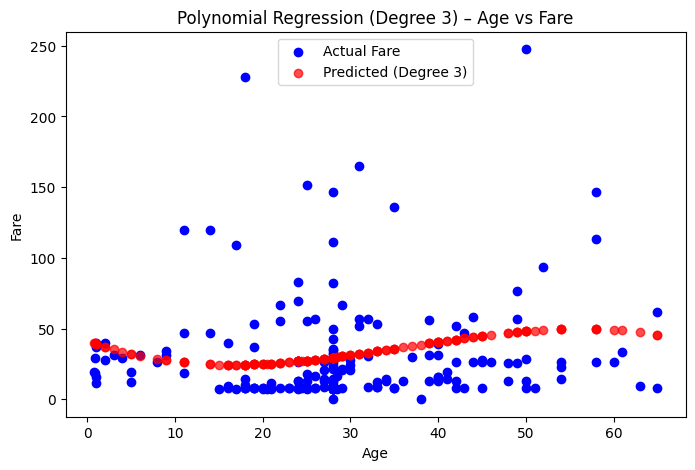

In [21]:
# Visualize degree 3 polynomial fit using AGE only (X1)
plt.figure(figsize=(8, 5))
plt.scatter(X1_test, y1_test, color='blue', label='Actual Fare')
plt.scatter(X1_test, y_pred_poly, color='red', label='Predicted (Degree 3)', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Polynomial Regression (Degree 3) – Age vs Fare")
plt.legend()
plt.show()


### 5.4 Reflection – Polynomial Cubic Model

**What patterns does the cubic model seem to capture?**  
The cubic (degree 3) model was able to capture a gentle curve in the data that the straight-line model missed. It followed the general trend where fare slightly increases with age in certain ranges, but also flattens out or dips slightly for others. It gave the model more flexibility to respond to the actual shape of the data.

**Where does it perform well or poorly?**  
It performed best in the middle age range — around 20 to 45 years old — where most of the passengers are and where the data is more consistent. It struggled with predictions for very young passengers and those over 60. That’s likely because there are fewer examples in those age groups, and the fare values are more spread out or unpredictable there.

**Did the polynomial fit outperform linear regression?**  
Yes, it definitely outperformed the basic linear regression. The cubic model had better R² and lower error values, and visually, it was able to match the curve of the data better than just drawing a straight line through everything.

**Where (on the graph or among which kinds of data points) does it fit best?**  
It fit best in the middle — for passengers in their 20s to 40s — where there are more data points and the fare trend is more stable. That’s where the model had enough information to learn from, so the predictions were more accurate. Outside of that range, it didn’t do as well, likely because of fewer examples and more randomness in fares.


## Section 5.5: Visualize Higher Order Polynomial

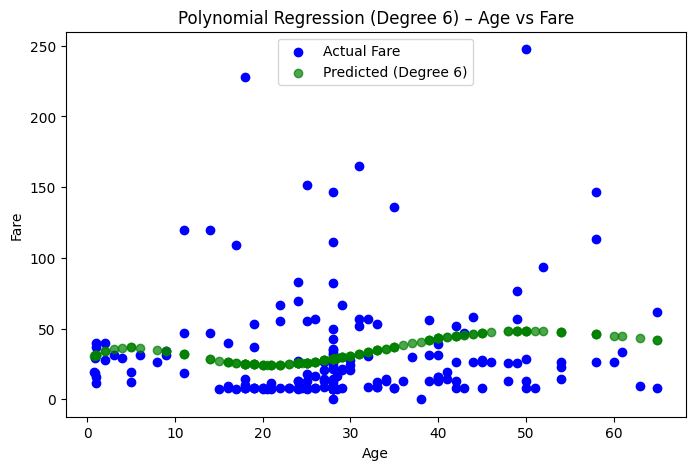

In [22]:
# Polynomial regression using only age (X1) – degree 6
poly_high = PolynomialFeatures(degree=6)
X1_train_poly_high = poly_high.fit_transform(X1_train)
X1_test_poly_high = poly_high.transform(X1_test)

# Train the model
poly_model_high = LinearRegression()
poly_model_high.fit(X1_train_poly_high, y1_train)

# Predict
y1_pred_poly_high = poly_model_high.predict(X1_test_poly_high)

# Plot actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(X1_test, y1_test, color='blue', label='Actual Fare')
plt.scatter(X1_test, y1_pred_poly_high, color='green', label='Predicted (Degree 6)', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Polynomial Regression (Degree 6) – Age vs Fare")
plt.legend()
plt.show()


### Section 5.5 – Visualizing a Higher-Degree Polynomial Model

For this part, I tried a degree 6 polynomial model using just `age` to predict fare.  
Compared to the earlier degree 3 model, the degree 6 version gave a much smoother and more flexible curve.

From the chart, I could see that the model did a better job following the overall pattern of the data — especially for passengers in their 20s to 40s. It picked up on some of the dips and rises that a lower-degree model would’ve smoothed over or missed.

That said, I also noticed the model hugging the data a little too tightly in places where the points are scattered. This tells me it's probably starting to **overfit**, especially since we’re only using one input feature (`age`), and fare is affected by many other factors.

**Overall, I think the degree 6 model looked better and made more accurate predictions than the cubic version, but it’s also more complex. If I were using this in a real-world scenario, I’d want to double-check that it's not just memorizing the training data.**


## Section 6: Final Thoughts & Insights

### 6.1 Summarize Findings

Working through this lab, I found that the most useful features for predicting fare were `pclass`, `age`, `sex`, and `family_size`.  
Out of all of them, `pclass` made the biggest difference — which makes sense, since your ticket class has a direct effect on how much you pay.  
Adding encoded `sex` also helped a bit when combined with the other features.

The best-performing model was the **polynomial regression (degree 3)**. It gave the highest R² and the lowest RMSE and MAE, meaning it captured more of the variation in the data than the others.  
Elastic Net also did pretty well, which surprised me — it seems like adding regularization helped control some of the noise while still fitting meaningful patterns.

I learned that increasing model complexity can help when the relationship between variables isn’t perfectly linear. Polynomial models picked up on curves that the basic linear model missed.  
Regularization didn’t make a huge difference in this case, but Elastic Net still outperformed the basic model slightly.

---

### 6.2 Discuss Challenges

Predicting fare turned out to be harder than I expected.  
There are some obvious factors like class and family size, but a lot of other things we don’t have in the dataset — like cabin location, time of booking, group discounts, or even which deck someone was on (which had too many missing values to use).

Also, the data had a lot of skew. Some passengers paid very little, while others paid hundreds of dollars. That wide range — and especially the outliers — made it tough for the model to make consistent predictions.  
I could really see that in the errors and in how the predictions tended to "flatten" for most passengers.

---

### 6.3 Optional Next Steps

If I had more time, I’d like to test some other features like `embarked`, `who`, or even try converting `class` from a category instead of relying only on `pclass`.

I’m also curious what would happen if I flipped the target and tried to **predict age instead of fare** — that could uncover some interesting patterns too.
